# Google AI chat models (gemini-pro)

Google AI의 `gemini`와 `gemini-vision` 모델뿐만 아니라 다른 생성 모델에 접근하려면 [langchain-google-genai](https://pypi.org/project/langchain-google-genai/) 통합 패키지의 `ChatGoogleGenerativeAI` 클래스를 사용하면 됩니다.


In [ ]:
# !pip install -qU langchain-google-genai

### API KEY 발급받기

- [링크](https://makersuite.google.com/app/apikey?hl=ko) 에서 API KEY를 발급받아주세요.
- 사용자의 Google API 키를 환경 변수 `GOOGLE_API_KEY`로 설정합니다.


In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install langchain-teddynote
from langchain_teddynote import logging
from langchain_teddynote.messages import stream_response

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH04-Models")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH04-Models


langchain_google_genai 패키지에서 ChatGoogleGenerativeAI 클래스를 가져옵니다.

- ChatGoogleGenerativeAI 클래스는 Google의 Generative AI 모델을 사용하여 대화형 AI 시스템을 구현하는 데 사용됩니다.
- 이 클래스를 통해 사용자는 Google의 대화형 AI 모델과 상호 작용할 수 있습니다.
- 모델과의 대화는 채팅 형식으로 이루어지며, 사용자의 입력에 따라 모델이 적절한 응답을 생성합니다.
- ChatGoogleGenerativeAI 클래스는 LangChain 프레임워크와 통합되어 있어, 다른 LangChain 컴포넌트와 함께 사용할 수 있습니다.


지원되는 모델 정보: https://ai.google.dev/gemini-api/docs/models/gemini?hl=ko

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

# ChatGoogleGenerativeAI 언어 모델을 초기화합니다.
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

# 프롬프트를 전달하여 결과를 생성합니다.
answer = llm.stream("자연어처리에 대해서 간략히 설명해 줘")

# 결과를 출력합니다.
stream_response(answer)

자연어처리(Natural Language Processing, NLP)는 **컴퓨터가 사람의 언어, 즉 '자연어'를 이해하고 분석하며 생성하는 기술 분야**입니다.

간단히 말해, 컴퓨터가 마치 사람처럼 말하고 글을 이해하고 소통할 수 있도록 돕는 인공지능의 한 분야라고 할 수 있습니다.

**핵심 내용:**

1.  **목표:** 컴퓨터와 사람 간의 효과적인 소통을 가능하게 하는 것입니다.
2.  **어려움:** 사람의 언어는 매우 복잡하고 모호하며, 문맥에 따라 의미가 달라지는 등 다양한 특징을 가지고 있어 컴퓨터가 이를 이해하기란 쉽지 않습니다. (예: "배"가 먹는 배인지, 타는 배인지, 신체 부위 배인지 구분)
3.  **작동 방식:** 텍스트나 음성 데이터를 컴퓨터가 처리할 수 있는 형태로 변환하고, 단어의 의미, 문장의 구조, 문맥 등을 파악하여 분석합니다. 최근에는 주로 **머신러닝(Machine Learning)**과 **딥러닝(Deep Learning)** 기술을 활용하여 발전하고 있습니다.
4.  **주요 응용 분야:**
    *   **번역:** 구글 번역기처럼 다른 언어로 바꿔주는 기술.
    *   **챗봇/가상 비서:** 사용자의 질문을 이해하고 답변하는 서비스 (예: Siri, ChatGPT).
    *   **감성 분석:** 텍스트에서 긍정, 부정 등 감성을 파악하는 것 (예: 상품 리뷰 분석).
    *   **정보 추출 및 요약:** 문서에서 핵심 정보를 뽑아내거나 긴 글을 요약하는 기술.
    *   **맞춤법 및 문법 검사:** 글의 오류를 찾아 수정해주는 기능.

결론적으로 NLP는 컴퓨터가 사람처럼 언어를 이해하고 소통할 수 있도록 돕는 인공지능의 핵심 분야이며, 우리의 일상생활에 깊숙이 들어와 편리함을 제공하고 있습니다.

In [4]:
from langchain_core.prompts import PromptTemplate

# ChatGoogleGenerativeAI 언어 모델을 초기화합니다.
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",  # 사용할 모델을 지정합니다.
)

# 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template(
    "예/아니오 질문에 대답하세요. {question}는 과일입니까?"
)

# 체인을 생성합니다.
chain = prompt | model

# 결과를 출력합니다.
stream_response(chain.stream({"question": "사과"}))

예

## Safety Settings

Gemini 모델에는 기본 안전 설정(Satety Settings) 이 있지만, 이를 재정의할 수 있습니다.

만약 모델로부터 많은 "Safety Warnings"를 받고 있다면, 모델의 `safety_settings` 속성을 조정해 볼 수 있습니다.

Google의 [Safety Setting Types](https://ai.google.dev/api/python/google/generativeai/types/SafetySettingDict) 문서에서는 사용 가능한 카테고리와 임계값에 대한 열거형 정보를 제공합니다.

이 문서에는 콘텐츠 필터링 및 안전 설정과 관련된 다양한 카테고리와 해당 임계값이 정의되어 있어, 개발자들이 생성형 AI 모델을 활용할 때 적절한 안전 설정을 선택하고 적용하는 데 도움을 줍니다.

이를 통해 개발자들은 모델이 생성하는 콘텐츠의 안전성과 적절성을 보장하고, 사용자에게 유해하거나 부적절한 내용이 노출되는 것을 방지할 수 있습니다.

In [5]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)

llm = ChatGoogleGenerativeAI(
    # 사용할 모델을 "gemini-pro"로 지정합니다.
    model="gemini-2.5-flash",
    safety_settings={
        # 위험한 콘텐츠에 대한 차단 임계값을 설정합니다.
        # 이 경우 위험한 콘텐츠를 차단하지 않도록 설정되어 있습니다. (그럼에도 기본적인 차단이 있을 수 있습니다.)
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
)

## Batch 단위 실행


In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    # 사용할 모델을 "gemini-pro"로 지정합니다.
    model="gemini-2.5-flash",
)

results = llm.batch(
    [
        "대한민국의 수도는?",
        "대한민국의 주요 관광지 5곳을 나열하세요",
    ]
)

for res in results:
    # 각 결과의 내용을 출력합니다.
    print(res.content)

대한민국(대한민국)의 수도는 **서울**입니다.
대한민국의 주요 관광지 5곳은 다음과 같습니다.

1.  **서울 (Seoul):** 대한민국의 수도이자 역사, 문화, 현대적인 매력이 공존하는 대표적인 도시입니다. 경복궁, N서울타워, 명동, 인사동 등 다양한 볼거리와 즐길 거리가 있습니다.

2.  **제주도 (Jeju Island):** 유네스코 세계자연유산으로 지정된 아름다운 섬으로, 한라산, 성산일출봉 등 독특한 자연경관과 푸른 바다가 어우러져 있습니다.

3.  **부산 (Busan):** 대한민국 제2의 도시이자 해양 도시로, 해운대 해수욕장, 감천문화마을, 자갈치 시장 등 다채로운 매력을 지닌 곳입니다.

4.  **경주 (Gyeongju):** 신라 천년의 고도로 '지붕 없는 박물관'이라 불리며, 불국사, 석굴암 등 유네스코 세계유산이 즐비한 역사 문화 도시입니다.

5.  **비무장지대 (DMZ - Demilitarized Zone):** 분단의 아픔과 평화의 염원이 공존하는 특별한 역사적 장소입니다. 판문점, 제3땅굴 등 세계적으로 유일무이한 경험을 할 수 있습니다.


## Multimodal 모델

`langchain-teddynote` 에서 구현한 멀티모달 모델에 `gemini-1.5-pro` 모델을 활용하여 이미지를 텍스트로 변환 가능합니다.

In [7]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
gemini = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

system_prompt = (
    "당신은 시인입니다. 당신의 임무는 주어진 이미지를 가지고 시를 작성하는 것입니다."
)

user_prompt = "다음의 이미지에 대한 시를 작성해주세요."

# 멀티모달 객체 생성
multimodal_gemini = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


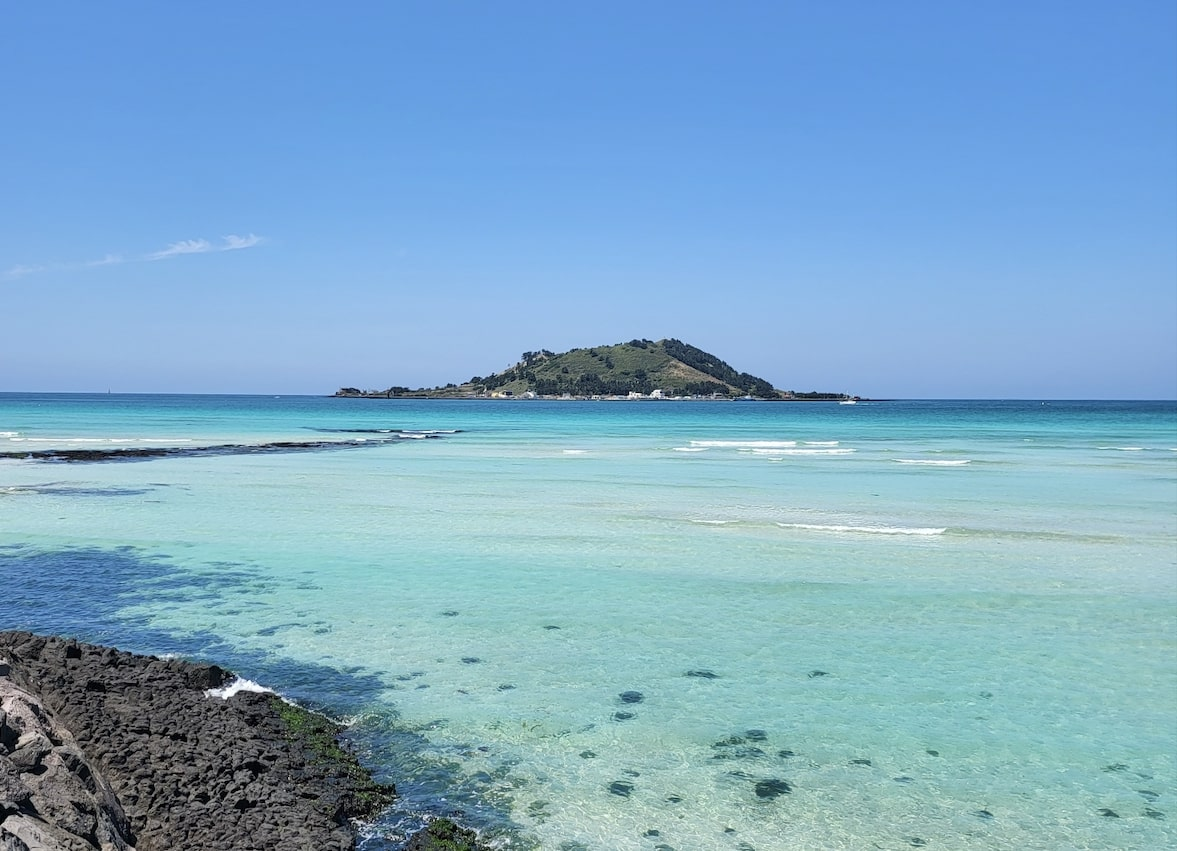

## 푸른 꿈의 조각

하늘은 끝없이 투명한 쪽빛,
수평선에 닿아 아득히 멀어지네.
하얀 실오라기 구름 한 조각,
고요히 흐르는 시간의 증표.

발 아래 닿는 물은 수정처럼 맑아,
연한 터키석 빛으로 반짝이고
바닥의 검은 돌멩이, 해초마저 선명하다.
오랜 시간 품은 현무암 바위는
푸른 물결에 잠겨 고요히 숨 쉬네.

잔잔한 물결이 흰 포말을 일으키고,
쉼 없이 밀려와 부드럽게 속삭인다.
세상의 모든 소란 잠재우는 듯,
투명한 바다 위에 평화가 흐른다.

저 멀리 푸른 바다 위에
초록빛 섬 하나 평화로이 떠 있네.
작은 집들이 점점이 박혀
고요한 풍경에 작은 숨결을 더한다.

시선 닿는 곳마다 투명한 평화,
시간마저 멈춘 듯 고요한 풍경.
이대로 영원히 머물고 싶은
순수한 자연의 노래, 바다의 숨결.

In [8]:
# 샘플 이미지 경로(파일의 경로, URL 등)를 지정합니다.
IMAGE_URL = "images/jeju-beach.jpg"

# 이미지 파일로 부터 질의
answer = multimodal_gemini.stream(IMAGE_URL)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)